In [185]:
# Carga de paquetes necesarios para graficar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Para leer archivos
import geopandas as gpd # Para hacer cosas geográficas
import seaborn as sns # Para hacer plots lindos
import networkx as nx # Construcción de la red en NetworkX
import scipy


# Preambulo

En esta sección cargamos los datos y los visualizamos. También construimos la matriz de adyacencia de la red de museos.

## Carga de datos de los museos

El listado de los museos, con el que se construye el [mapa](https://mapas.museosabiertos.org/museos/caba/), lo podemos encontrar [acá](https://github.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/blob/principal/data/export.geojson?short_path=bc357f3). También descargamos los barrios de CABA como complemento para los gráficos.

In [186]:
# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

## Visualización

<Axes: >

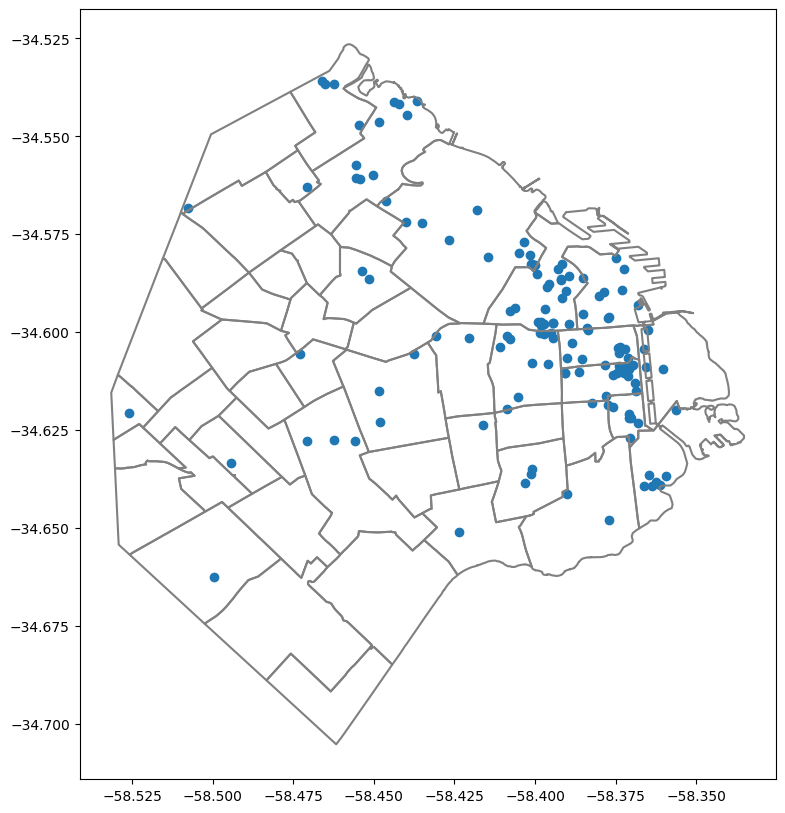

In [187]:
# Armamos el gráfico para visualizar los museos
fig, ax = plt.subplots(figsize=(10, 10))
barrios.boundary.plot(color='gray',ax=ax)
museos.plot(ax=ax)

## Cálculo de la matriz de distancias

Ahora construimos la matriz de distancias entre todos los museos. Como la tierra es un [geoide](https://es.wikipedia.org/wiki/Geoide) (es decir que no es [plana](https://es.wikipedia.org/wiki/Terraplanismo)), el cálculo de distancias no es una operación obvia. Una opción es proyectar a un [sistema de coordenadas local](https://geopandas.org/en/stable/docs/user_guide/projections.html), de forma tal que las distancias euclideas se correspondan con las distancias en metros. En este notebook usamos [EPSG](https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset) 22184.

In [188]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa),
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()

### Matriz de adyacencia: construimos una matriz conectando a cada museo con los $m$ más cercanos

In [189]:
def construye_adyacencia(D, m):
    # Función que construye la matriz de adyacencia del grafo de museos
    # D matriz de distancias, m cantidad de links por nodo
    # Retorna la matriz de adyacencia como un numpy.
    D = D.copy()
    l = []  # Lista para guardar las filas
    for fila in D:  # recorriendo las filas, anexamos vectores lógicos
        m_int = int(m)  # Aseguramos que m sea un entero
        if m_int >= len(fila):  # Validación para evitar índices fuera de rango
            raise ValueError(f"El valor de m ({m_int}) es mayor o igual al número de elementos en la fila ({len(fila)}).")
        l.append(fila <= fila[np.argsort(fila)[m_int]])  # Elegimos nodos a una distancia menor o igual al m-ésimo más cercano
    A = np.asarray(l).astype(int)  # Convertimos a entero
    np.fill_diagonal(A, 0)  # Borramos diagonal para eliminar autolinks
    return A
m = 3 # Cantidad de links por nodo
A = construye_adyacencia(D,m)
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(136, 136))

## Construcción de la red en NetworkX (sólo para las visualizaciones)

In [190]:
G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}

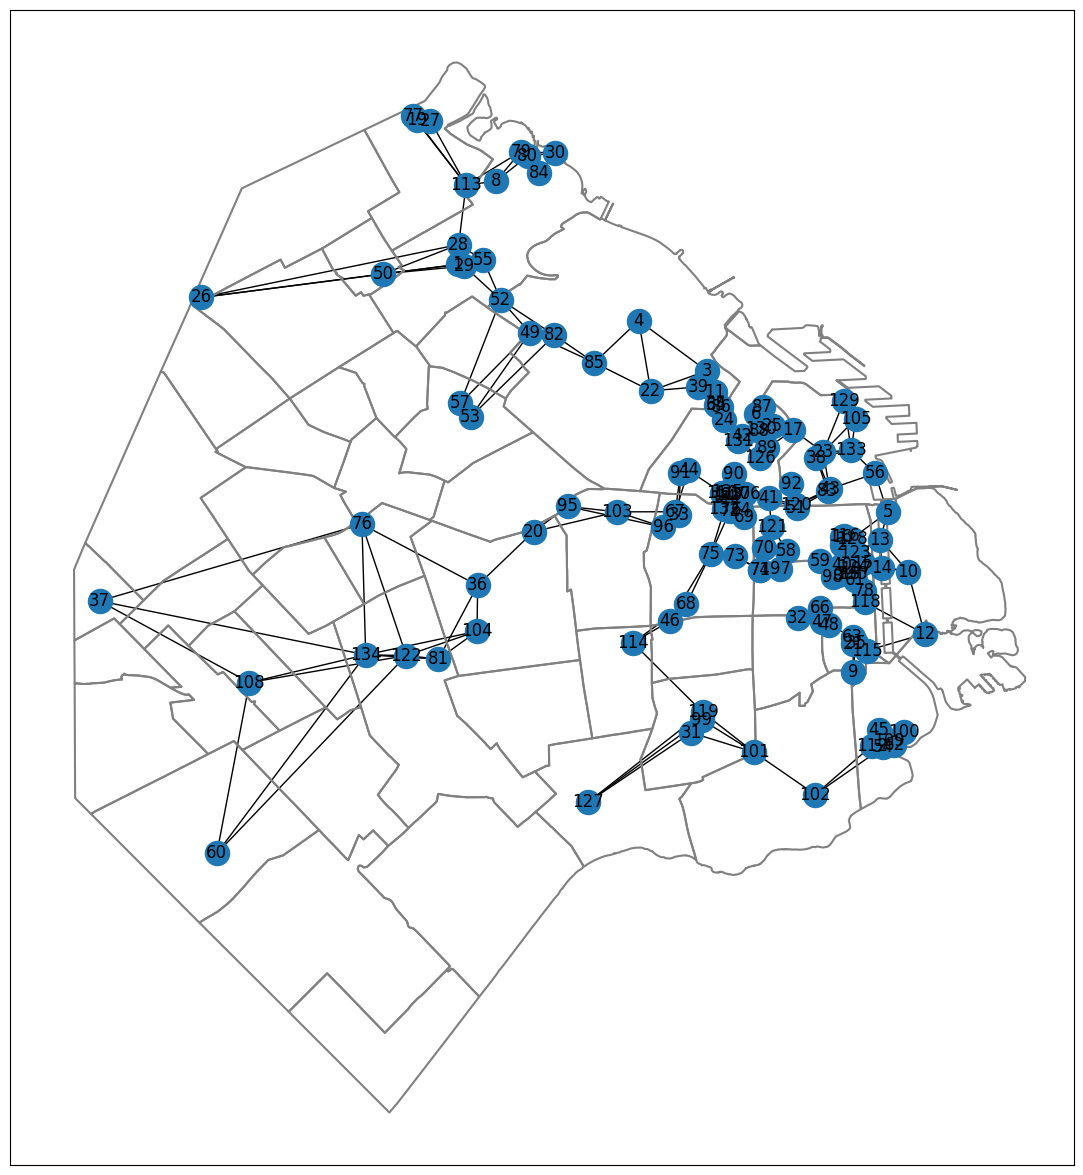

In [191]:
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

# Resolución del TP

Aquí empieza la aventura... ¡diviertanse y consulten lo que necesiten!

## Punto 1:

In [192]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(136, 136))

In [193]:
matriz = np.array([[1, 0,1],
                   [1, 0, 1],
                    [1,1,1]])
#calcular matriz de transiciones


## Punto 2:


## Punto 3:
Usando la factorización LU implementada, encuentre el vector $p = M^ {−1}b$ en los siguientes casos

Creamos la funcion para contruir M de acuerdo a los m vecinos más cercanos y el factor alpha de amortiguamiento


### a)
 Construimos la red conectando a cada museo con sus $m = 3$ vecinos más cercanos, y 
calculamos el Page Rank usando $a = 1/5 $. 

In [194]:
import importlib            
import template_funciones as tf
importlib.reload(tf)

<module 'template_funciones' from '/home/peter/UBA/2025_1erCuatri/Algebra lineal computacional/TP-ALC/template_funciones.py'>

In [195]:
page_rank_list= np.array([])

In [196]:
from template_funciones import calcula_pagerank, graph_map_rank

A= construye_adyacencia(D, 3)
page_rank= calcula_pagerank(A, 0.2)
#agregar vector page rank para 2da parte del ejercicio
page_rank_list= np.append(page_rank_list, page_rank) 
print(page_rank)


136
[0.00356297 0.01441101 0.0092278  0.00430571 0.00307664 0.00335716
 0.01447441 0.00615846 0.00272908 0.00147059 0.00266301 0.01156786
 0.00147059 0.00307597 0.00300098 0.00386685 0.0092278  0.00258555
 0.02128085 0.00315126 0.0043892  0.01092533 0.00389708 0.00557481
 0.00593728 0.01197149 0.00147059 0.00315126 0.01540456 0.01509042
 0.01020979 0.01019829 0.00453263 0.00921381 0.01411224 0.01092533
 0.0065917  0.00211793 0.00404036 0.003658   0.00356297 0.00864132
 0.00217402 0.00545553 0.0035772  0.00724286 0.00315126 0.00574134
 0.00574134 0.00511998 0.00186275 0.00653139 0.0046978  0.00200535
 0.01080606 0.01469827 0.00399869 0.00200535 0.00482719 0.00147059
 0.00147059 0.0083576  0.00834427 0.01182443 0.003521   0.01578881
 0.00574134 0.01131853 0.00315126 0.00240952 0.00883675 0.00884081
 0.00527951 0.00248784 0.00884081 0.00381468 0.00203537 0.00315126
 0.00211793 0.01177788 0.01078433 0.0127796  0.00497673 0.00373347
 0.01020979 0.00602271 0.01411224 0.00533043 0.01540753 0.

Y graficamos la red asignadole un tamaño a cada nodo proporcional a su posición en el ranking

<Figure size 1200x1200 with 0 Axes>

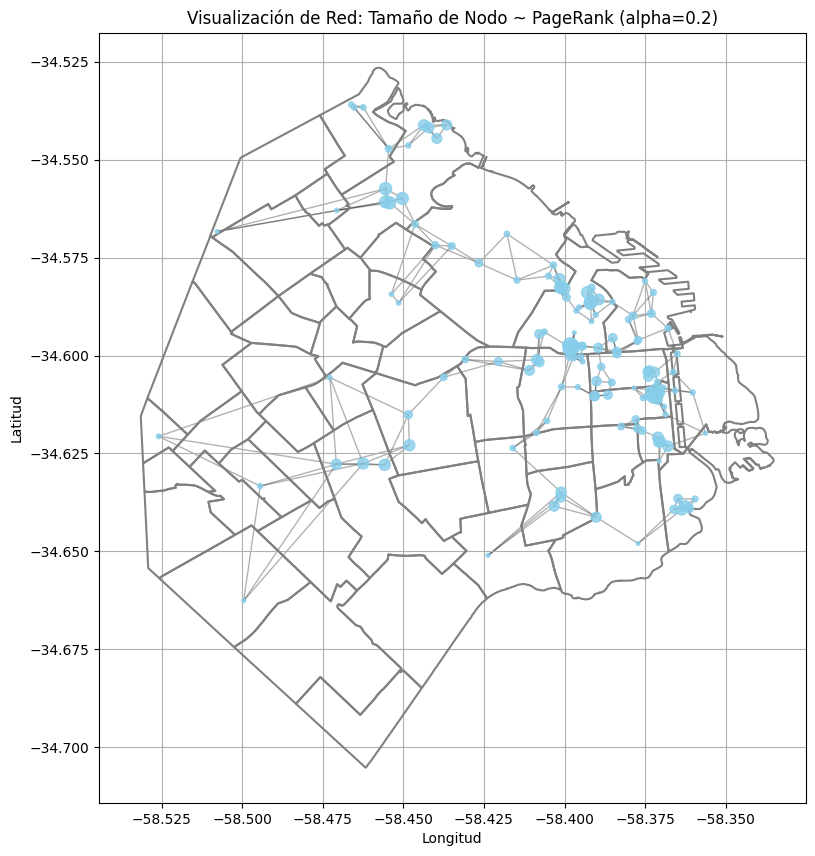

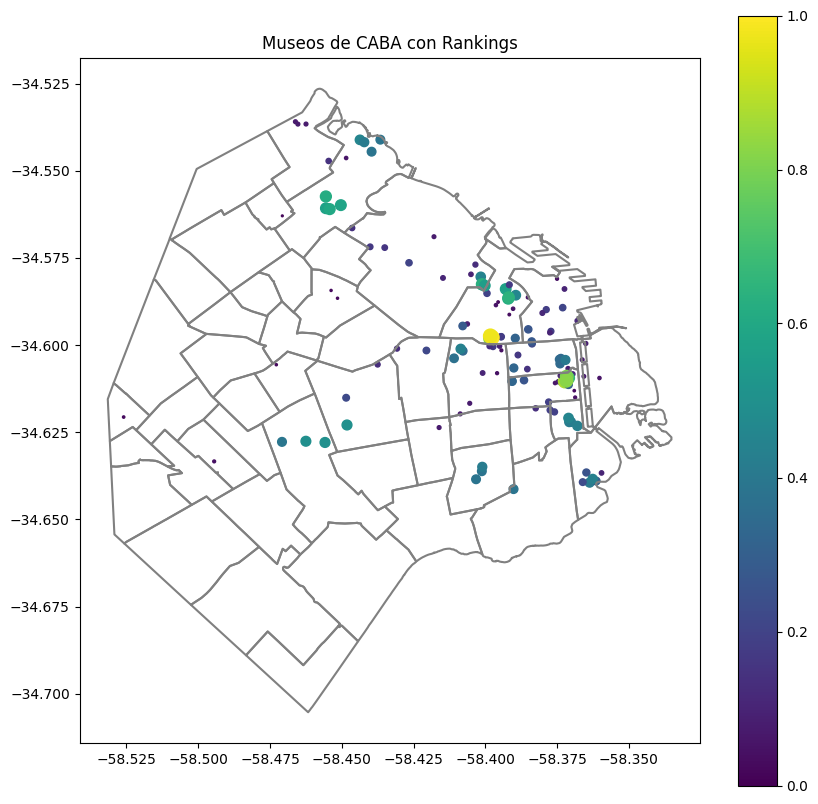

In [197]:
G= nx.from_numpy_array(A)
node_sizes= [ranking * 5000 for ranking in page_rank]
pos = { i : (row['geometry'].x, row['geometry'].y)for i,row in museos.iterrows()}
plt.figure(figsize=(12,12))
fig, ax = plt.subplots(figsize=(10, 10))
barrios.boundary.plot(color='gray', ax=ax)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='black')
plt.title(f"Visualización de Red: Tamaño de Nodo ~ PageRank (alpha={0.2})")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.axis('on') # O 'off' si no quieres ejes
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.grid(True) # Opcional: añadir una grilla
plt.show()
graph_map_rank(page_rank,barrios, museos)


B. Construyendo la red conectando a cada museo con sus m vecinos más cercanos,
para m = 1, 3, 5, 10 y usando α = 1/5.

In [198]:
test_cases = np.array([(1, 0.2), (3, 0.2), (5, 0.2), (10, 0.2)])
M_cases = np.array([calcula_M(D, m, alpha) for m, alpha in test_cases])
for M in M_cases:
    LU= calculaLU(M)
    L = np.tril(LU,-1) + np.eye(M.shape[0])
    U = np.triu(LU)
    b = np.ones(M.shape[0])
    page_rank = resolver_LU(L, U, b)
    print(page_rank)
    page_rank_list= np.append(page_rank_list, page_rank)

136
[0.01323529 0.02120915 0.00147059 0.00147059 0.00147059 0.00147059
 0.00735294 0.01062092 0.00735294 0.00147059 0.00147059 0.00452941
 0.00147059 0.00264706 0.00476471 0.00645882 0.01323529 0.00147059
 0.00996732 0.01062092 0.00735294 0.0174183  0.00147059 0.01323529
 0.00147059 0.00264706 0.00147059 0.00147059 0.00147059 0.02055556
 0.00147059 0.00264706 0.00147059 0.01323529 0.02128758 0.01846405
 0.00735294 0.00147059 0.01205882 0.00382353 0.00147059 0.00147059
 0.00735294 0.00735294 0.00735294 0.00147059 0.01062092 0.01323529
 0.01205882 0.01205882 0.00264706 0.00996732 0.00147059 0.00735294
 0.00264706 0.00264706 0.00147059 0.00735294 0.00735294 0.00147059
 0.00147059 0.00147059 0.01794118 0.00147059 0.00735294 0.02212418
 0.00264706 0.01205882 0.00996732 0.00735294 0.00264706 0.01205882
 0.00735294 0.00735294 0.01323529 0.00735294 0.00147059 0.00996732
 0.00735294 0.01205882 0.01323529 0.01749673 0.01323529 0.00735294
 0.00264706 0.00264706 0.00264706 0.00735294 0.01205882 0.

C. para m = 5, considerando los valores de α = 6/7, 4/5, 2/3, 1/2, 1/3, 1/5, 1/7.

In [199]:
test_cases = np.array([
    (5, 6/7),
    (5, 4/5),
    (5, 2/3),
    (5, 1/2),
    (5, 1/3),
    (5, 1/5),
    (5, 1/7)
])
M_cases = np.array([calcula_M(D, m, alpha) for m, alpha in test_cases])
for M in M_cases:
    LU= calculaLU(M)
    L = np.tril(LU,-1) + np.eye(M.shape[0])
    U = np.triu(LU)
    b = np.ones(M.shape[0])
    page_rank = resolver_LU(L, U, b)
    print(page_rank)
    page_rank_list= np.append(page_rank_list, page_rank)

136
[0.00736638 0.00758222 0.00733774 0.00713013 0.00672047 0.00669595
 0.0074071  0.00712228 0.00797217 0.00694954 0.00667373 0.00758205
 0.00630252 0.00687564 0.00668965 0.00780296 0.00712261 0.00714666
 0.00849586 0.00669156 0.00711326 0.00775442 0.00669768 0.00752312
 0.00738544 0.00758302 0.00630252 0.0069249  0.00758817 0.00796625
 0.00717472 0.00732422 0.00670427 0.00754827 0.00760116 0.00755621
 0.00737607 0.00669102 0.00794474 0.00796624 0.00800471 0.00713726
 0.00797951 0.00737273 0.00694373 0.00756467 0.00733714 0.00713586
 0.00795795 0.00733126 0.00692684 0.00735982 0.00818607 0.00669791
 0.00756467 0.00781963 0.00689428 0.00649389 0.00735889 0.00671495
 0.00669102 0.00742389 0.00738381 0.00757935 0.00712206 0.0077872
 0.00692532 0.00754297 0.00672679 0.00712934 0.00756246 0.00735821
 0.00712922 0.00732867 0.00735821 0.00713471 0.00734466 0.00669156
 0.00689616 0.00797217 0.00740806 0.00777153 0.00751794 0.00777674
 0.00717472 0.00711016 0.00760116 0.00673081 0.00818352 0.0

Ahora para cada valor de page_rank obtenido, identificamos los 3 museos mas importante 

In [200]:
# You can add this function to template_funciones.py or define it in the notebook
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_rank_stability(page_rank_list, parameter_values, museos_df, parameter_name='Parameter'):
    """
    Analyzes and plots the PageRank stability of top museums as a parameter varies.

    Args:
        page_rank_list (list): A list of NumPy arrays, where each array is a PageRank vector.
        parameter_values (list): A list of the corresponding parameter values (e.g., m or alpha).
        museos_df (pd.DataFrame or gpd.GeoDataFrame): DataFrame with museum info. 
                                                    Must have a 'NOMBRE' column and its
                                                    index must align with page_rank vectors.
        parameter_name (str): The name of the parameter being varied (e.g., 'm' or 'alpha') 
                              for plot labels.
    """
    if len(page_rank_list) != len(parameter_values):
        raise ValueError("page_rank_list and parameter_values must have the same length.")
    if not page_rank_list:
        print("Input list is empty.")
        return

    num_params = len(parameter_values)
    num_museos = len(page_rank_list[0])

    # Store scores for museums that reach the top 3 at any point
    # Key: museum index, Value: list of scores across parameter_values (use np.nan for missing)
    top_museum_scores = defaultdict(lambda: [np.nan] * num_params)
    top_museum_indices = set()

    print("Identifying top 3 museums for each parameter value...")
    for i, pr_vector in enumerate(page_rank_list):
        if len(pr_vector) != num_museos:
             raise ValueError(f"PageRank vector at index {i} has unexpected length {len(pr_vector)}. Expected {num_museos}.")
             
        # Get indices of top 3 scores (highest score first)
        top_3_indices_this_run = np.argsort(pr_vector)[-3:][::-1]
        
        print(f"Parameter={parameter_values[i]:.2f}, Top 3 Indices: {top_3_indices_this_run}")

        for rank, idx in enumerate(top_3_indices_this_run):
            top_museum_indices.add(idx)
            top_museum_scores[idx][i] = pr_vector[idx]
            # Optional: Print top museum names for verification
            # try:
            #     print(f"  Rank {rank+1}: Index={idx}, Name={museos_df.iloc[idx]['NOMBRE']}, Score={pr_vector[idx]:.4f}")
            # except (IndexError, KeyError):
            #      print(f"  Rank {rank+1}: Index={idx} (Name not found or index mismatch), Score={pr_vector[idx]:.4f}")


    print(f"\nTotal unique museums in Top 3 across all runs: {len(top_museum_indices)}")

    # --- Plotting ---
    plt.figure(figsize=(12, 8))
    
    print("\nPlotting scores for top museums...")
    plotted_indices = []
    for idx in top_museum_indices:
        scores = top_museum_scores[idx]
        try:
            museum_name = museos_df.iloc[idx]['NOMBRE']
        except (IndexError, KeyError):
            museum_name = f"Museo Index {idx}" 
            print(f"Warning: Could not find name for museum index {idx}. Using index as label.")
            
        # Only plot if the museum actually had scores (was in top 3 at least once)
        if not np.all(np.isnan(scores)):
            plt.plot(parameter_values, scores, marker='o', linestyle='-', label=museum_name)
            plotted_indices.append(idx)
        else:
             print(f"Skipping plot for Index {idx} (all NaN scores). This shouldn't normally happen.")

    plt.title(f'PageRank de Museos Top vs {parameter_name}')
    plt.xlabel(parameter_name)
    plt.ylabel('PageRank Score')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Place legend outside plot
    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
    plt.show()

    print("\nAnalysis Complete.")
    print("Plotted museums (indices):", sorted(plotted_indices))



In [201]:
m_values = [1,3,5,10] # Your list of m values used
alpha_fixed = 0.2 # The alpha value you kept constant

all_pageranks_for_alpha = [] 
for m in m_values:
    # Assuming D is your distance matrix
    A = tf.construye_adyacencia(D, m) 
    # Assuming you have a function like this (or use networkx.pagerank)
    pr = tf.calcula_pagerank(A, alpha_fixed) 
    all_pageranks_for_alpha.append(pr)

136
136
136
136


Identifying top 3 museums for each parameter value...
Parameter=1.00, Top 3 Indices: [ 65 107  34]
Parameter=3.00, Top 3 Indices: [117 125  18]
Parameter=5.00, Top 3 Indices: [ 93 125 117]
Parameter=10.00, Top 3 Indices: [124 135  15]

Total unique museums in Top 3 across all runs: 10

Plotting scores for top museums...


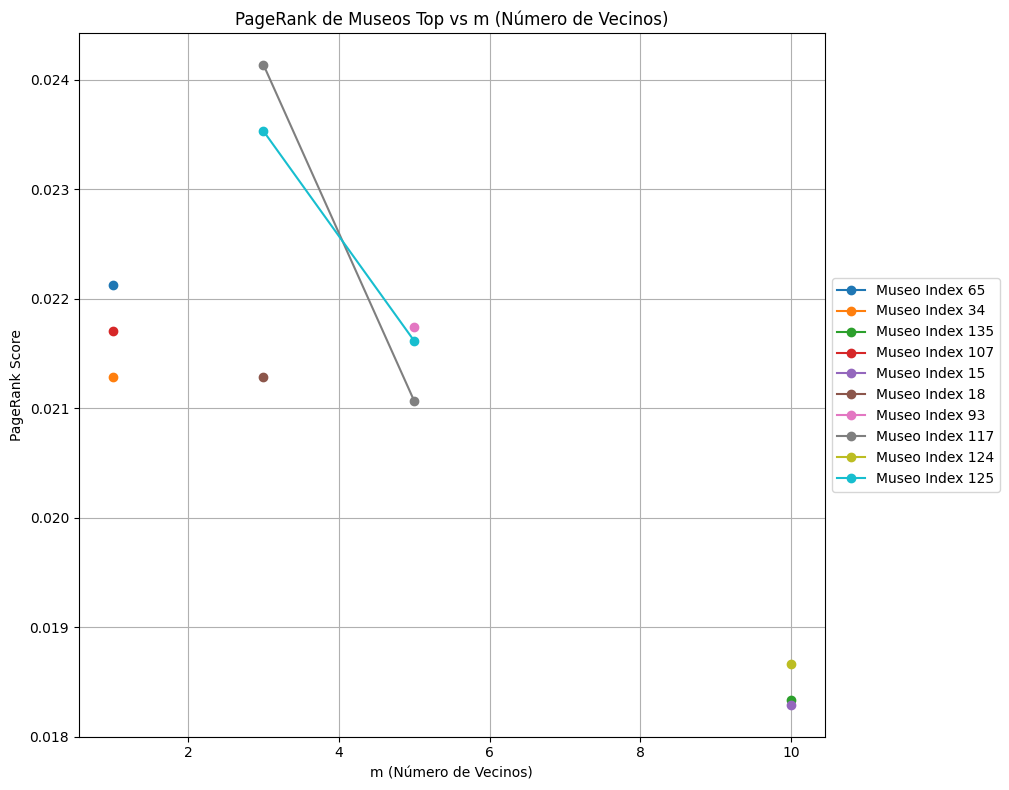


Analysis Complete.
Plotted museums (indices): [np.int64(15), np.int64(18), np.int64(34), np.int64(65), np.int64(93), np.int64(107), np.int64(117), np.int64(124), np.int64(125), np.int64(135)]


In [202]:
analyze_rank_stability(all_pageranks_for_alpha, m_values, museos, parameter_name='m (Número de Vecinos)')


Calculando PageRank para m=5 y varios alpha...
136
  Calculado para alpha = 0.86
136
  Calculado para alpha = 0.80
136
  Calculado para alpha = 0.67
136
  Calculado para alpha = 0.50
136
  Calculado para alpha = 0.33
136
  Calculado para alpha = 0.20
136
  Calculado para alpha = 0.14
Identifying top 3 museums for each parameter value...
Parameter=0.86, Top 3 Indices: [107 135  18]
Parameter=0.80, Top 3 Indices: [107 135  18]
Parameter=0.67, Top 3 Indices: [107  18 135]
Parameter=0.50, Top 3 Indices: [107  93 135]
Parameter=0.33, Top 3 Indices: [ 93 125 107]
Parameter=0.20, Top 3 Indices: [ 93 125 117]
Parameter=0.14, Top 3 Indices: [ 93 125 117]

Total unique museums in Top 3 across all runs: 6

Plotting scores for top museums...


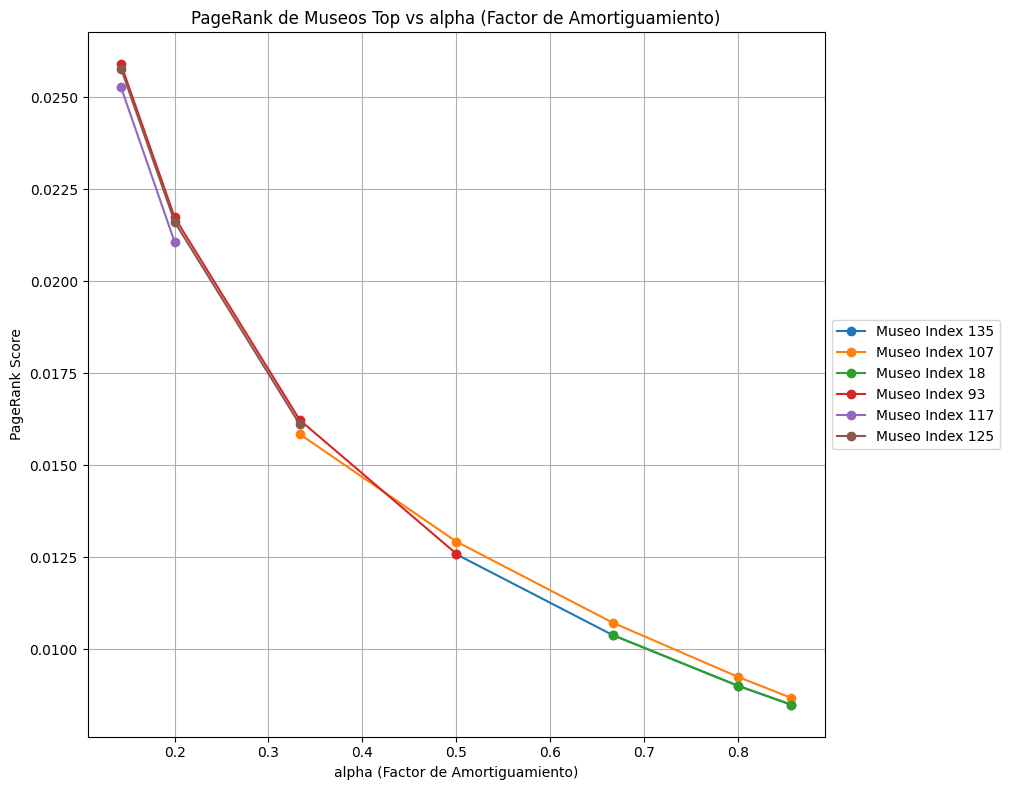


Analysis Complete.
Plotted museums (indices): [np.int64(18), np.int64(93), np.int64(107), np.int64(117), np.int64(125), np.int64(135)]


In [204]:


# --- Preparación ---


m_fixed = 5 # Your list of m values used
alpha_values = [6/7, 4/5, 2/3, 1/2, 1/3, 1/5, 1/7] # The alpha value you kept constant

# 3. Calcula los PageRanks para cada alpha
print(f"Calculando PageRank para m={m_fixed} y varios alpha...")

# Calcula A una sola vez (ya que m es fijo)
# Asegúrate de que 'D' (matriz de distancias) esté definida
A_fixed_m = tf.construye_adyacencia(D, m_fixed) 

all_pageranks_for_alpha = []
for alpha in alpha_values:
    # Calcula PageRank usando la A fija y el alpha actual
    # Asegúrate de tener una función [calcula_pagerank(A, alpha)](cci:1://file:///home/peter/UBA/2025_1erCuatri/Algebra%20lineal%20computacional/TP-ALC/template_funciones.py:166:0-179:12)
    try:
        pr = tf.calcula_pagerank(A_fixed_m, alpha) 
        all_pageranks_for_alpha.append(pr)
        print(f"  Calculado para alpha = {alpha:.2f}")
    except Exception as e:
        print(f"  Error calculando PageRank para alpha = {alpha:.2f}: {e}")
        # Decide si quieres añadir un placeholder (None o array de NaNs) o saltar
        # all_pageranks_for_alpha.append(None) # Opcional: manejar errores

# Filtra los None si decidiste añadirlos en caso de error y ajusta alpha_values
valid_indices = [i for i, pr in enumerate(all_pageranks_for_alpha) if pr is not None]
all_pageranks_for_alpha_valid = [all_pageranks_for_alpha[i] for i in valid_indices]
alpha_values_valid = [alpha_values[i] for i in valid_indices]

# Asegúrate de que 'museos' esté definido y su índice coincida con los vectores PR
# museos = gpd.read_file(...) 
# museos = museos.reset_index(drop=True) # Si es necesario alinear índices

# 4. Llama a la función de análisis
# Asegúrate de que la función analyze_rank_stability esté definida o importada
if all_pageranks_for_alpha_valid:
    analyze_rank_stability(
        all_pageranks_for_alpha_valid, 
        alpha_values_valid, 
        museos, 
        parameter_name='alpha (Factor de Amortiguamiento)'
    )
else:
    print("No se pudieron calcular PageRanks válidos para analizar.")


Calculando A para m = 5...
Generando gráficos para distintos alpha...
  Calculando PageRank para alpha = 0.86
136
  Calculando PageRank para alpha = 0.80
136
  Calculando PageRank para alpha = 0.67
136
  Calculando PageRank para alpha = 0.50
136
  Calculando PageRank para alpha = 0.33
136
  Calculando PageRank para alpha = 0.20
136
  Calculando PageRank para alpha = 0.14
136


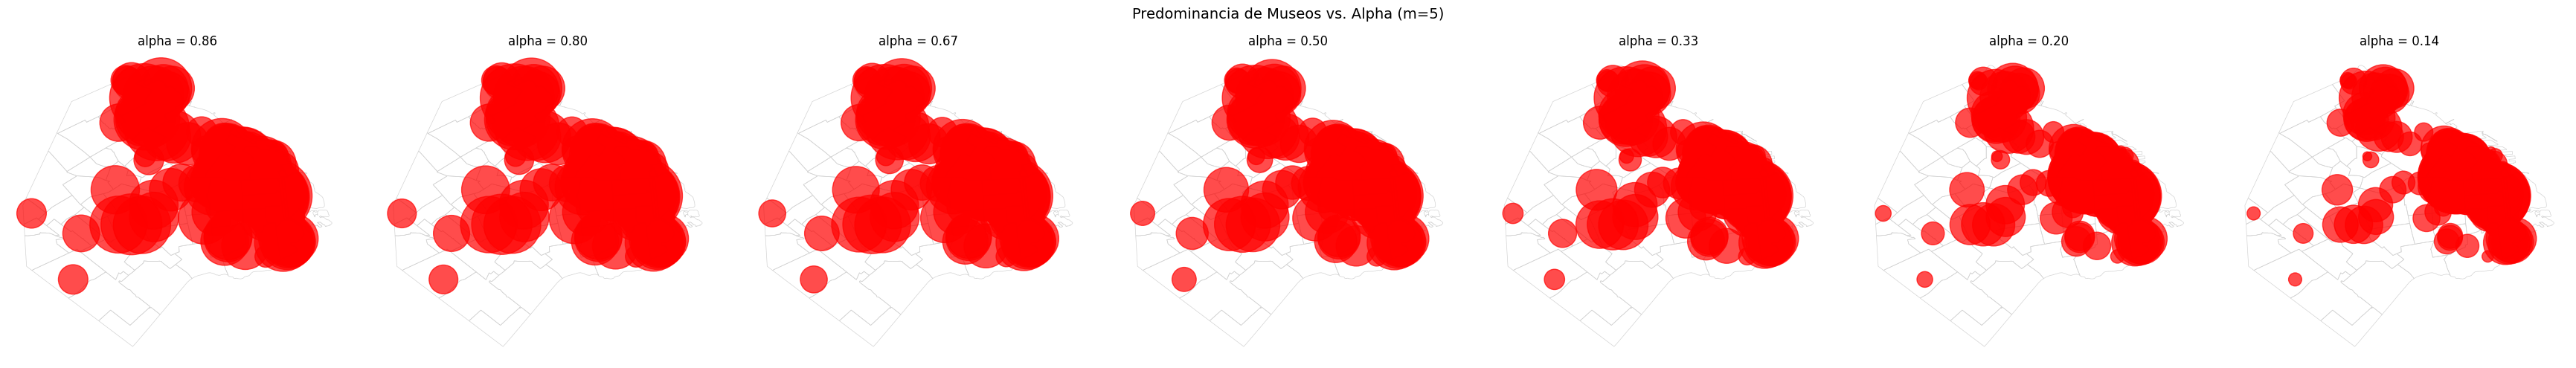

In [210]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
# Asegúrate de importar geopandas y tus funciones
# import geopandas as gpd
import template_funciones as tf

# --- Configuración ---
m_fijo_para_alpha = 5 # Elige un valor representativo para m
alphas_a_probar = [6/7, 4/5, 2/3, 1/2, 1/3, 1/5, 1/7] # Elige los alphas a visualizar
num_alphas = len(alphas_a_probar)

# Asegúrate que D, museos, barrios estén definidos
# D = ...
# museos = ... (Debe tener 'geometry' y el índice alineado con A/ranking)
# barrios = ... (Debe tener 'geometry')

# Calcula A una sola vez
print(f"Calculando A para m = {m_fijo_para_alpha}...")
A_para_alpha = tf.construye_adyacencia(D, m_fijo_para_alpha)

# Calcula posiciones una sola vez
pos_museos = {i: (row['geometry'].x, row['geometry'].y) for i, row in museos.iterrows()}
G_para_alpha = nx.from_numpy_array(A_para_alpha) # Grafo es el mismo, sólo cambia el rank

# --- Generar Gráficos ---
fig_a, axes_a = plt.subplots(nrows=1, ncols=num_alphas, figsize=(5 * num_alphas, 5), sharex=True, sharey=True)
# Si sólo es un alpha, axes_a no será un array, ajústalo:
if num_alphas == 1:
    axes_a = [axes_a]

print("Generando gráficos para distintos alpha...")
for i, alpha_val in enumerate(alphas_a_probar):
    ax = axes_a[i]
    print(f"  Calculando PageRank para alpha = {alpha_val:.2f}")
    try:
        # Asegúrate que tu función se llame calcula_pagerank y acepte A, alpha
        ranking = tf.calcula_pagerank(A_para_alpha, alpha_val) 
        
        # Escala de tamaño (ajusta el multiplicador 10000 si es necesario)
        # Normalizar puede ser mejor para comparar visualmente:
        min_r, max_r = np.min(ranking), np.max(ranking)
        if max_r > min_r:
             norm_ranking = (ranking - min_r) / (max_r - min_r)
        else:
             norm_ranking = np.ones_like(ranking) * 0.5 # Si todos son iguales
        node_sizes = norm_ranking * 5000 # Tamaño basado en rank normalizado (0-1) * factor
        
        # Dibujar
        barrios.boundary.plot(color='lightgray', ax=ax, linewidth=0.5)
        nx.draw_networkx_nodes(G_para_alpha, pos_museos, ax=ax, node_size=node_sizes, 
                               node_color='red', alpha=0.7)
        # Opcional: dibujar ejes muy sutilmente si ayuda
        # nx.draw_networkx_edges(G_para_alpha, pos_museos, ax=ax, alpha=0.05, edge_color='gray', width=0.5) 
        
        ax.set_title(f'alpha = {alpha_val:.2f}')
        ax.set_aspect('equal', adjustable='box')
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                       labelbottom=False, labelleft=False) # Ocultar ticks y etiquetas
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    except Exception as e:
        print(f"  Error graficando para alpha = {alpha_val:.2f}: {e}")
        ax.set_title(f'alpha = {alpha_val:.2f}\nError')

fig_a.suptitle(f'Predominancia de Museos vs. Alpha (m={m_fijo_para_alpha})', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar para el supertítulo
plt.show()

Generando gráficos para distintos m...
  Calculando A y PageRank para m = 1
136
  Calculando A y PageRank para m = 3
136
  Calculando A y PageRank para m = 5
136
  Calculando A y PageRank para m = 10
136
  Calculando A y PageRank para m = 20
136


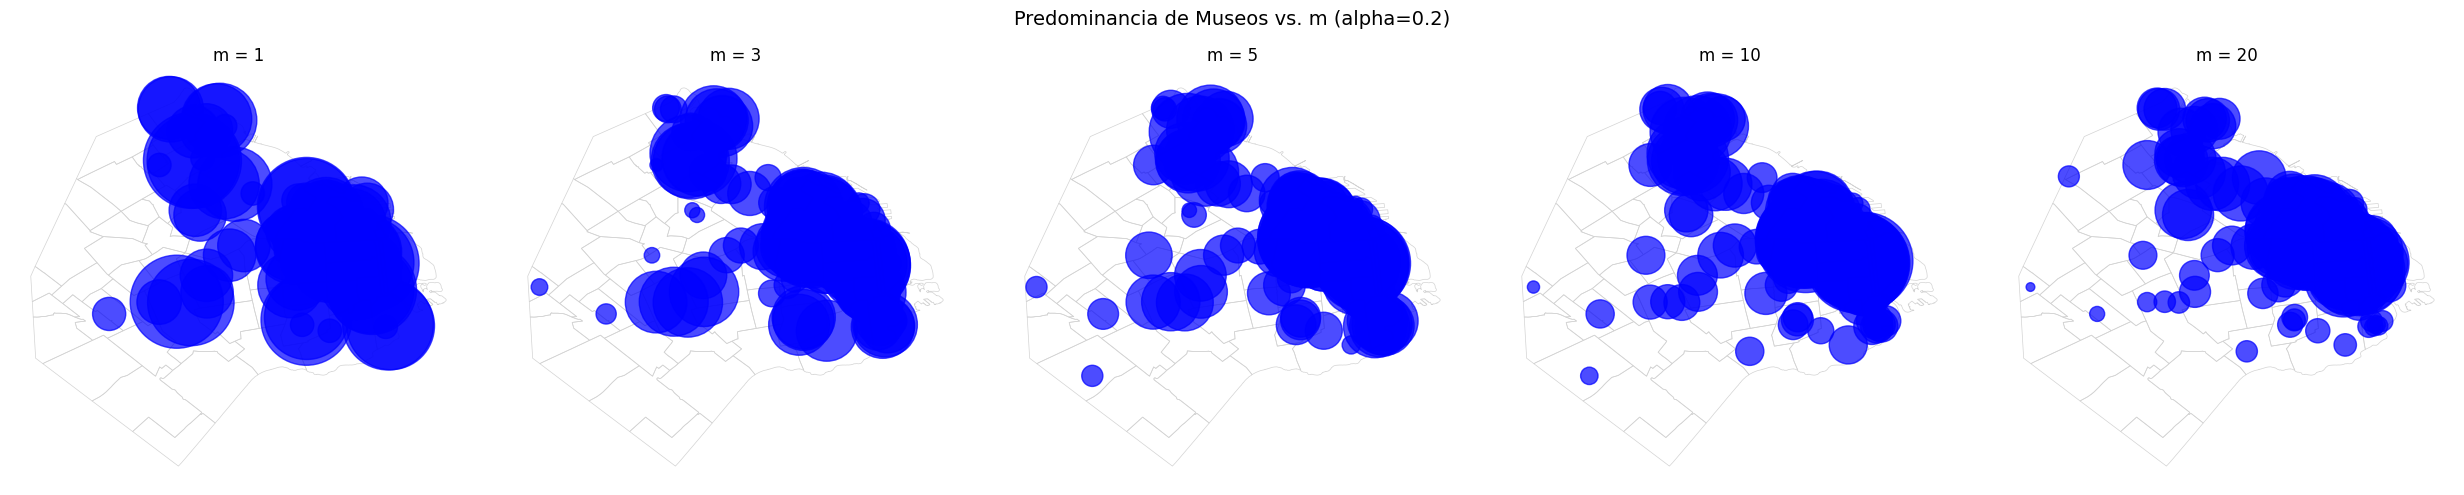

In [209]:


# --- Configuración ---
alpha_fijo_para_m = 0.2 # Elige un valor representativo para alpha
ms_a_probar = [1, 3, 5, 10,20] # Elige los m a visualizar
num_ms = len(ms_a_probar)

# Asegúrate que D, museos, barrios estén definidos
# D = ...
# museos = ... 
# barrios = ...

# Calcula posiciones una sola vez (son las mismas)
pos_museos = {i: (row['geometry'].x, row['geometry'].y) for i, row in museos.iterrows()}

# --- Generar Gráficos ---
fig_m, axes_m = plt.subplots(nrows=1, ncols=num_ms, figsize=(5 * num_ms, 5), sharex=True, sharey=True)
if num_ms == 1:
    axes_m = [axes_m]

print("Generando gráficos para distintos m...")
for i, m_val in enumerate(ms_a_probar):
    ax = axes_m[i]
    print(f"  Calculando A y PageRank para m = {m_val}")
    try:
        A = tf.construye_adyacencia(D, m_val)
        G = nx.from_numpy_array(A) # El grafo cambia con m
        ranking = tf.calcula_pagerank(A, alpha_fijo_para_m)
        
        # Escala de tamaño (ajusta el multiplicador si es necesario)
        min_r, max_r = np.min(ranking), np.max(ranking)
        if max_r > min_r:
             norm_ranking = (ranking - min_r) / (max_r - min_r)
        else:
             norm_ranking = np.ones_like(ranking) * 0.5 # Si todos son iguales
        node_sizes = norm_ranking * 5000 # Tamaño basado en rank normalizado (0-1) * factor
        
        # Dibujar
        barrios.boundary.plot(color='lightgray', ax=ax, linewidth=0.5)
        nx.draw_networkx_nodes(G, pos_museos, ax=ax, node_size=node_sizes, 
                               node_color='blue', alpha=0.7)
        # Opcional: dibujar ejes muy sutilmente si ayuda
        # nx.draw_networkx_edges(G, pos_museos, ax=ax, alpha=0.05, edge_color='gray', width=0.5)

        ax.set_title(f'm = {m_val}')
        ax.set_aspect('equal', adjustable='box')
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False,
                       labelbottom=False, labelleft=False) # Ocultar ticks y etiquetas
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    except Exception as e:
        print(f"  Error graficando para m = {m_val}: {e}")
        ax.set_title(f'm = {m_val}\nError')


fig_m.suptitle(f'Predominancia de Museos vs. m (alpha={alpha_fijo_para_m})', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustar para el supertítulo
plt.show()


## Punto 4:

## Punto 5:

In [ ]:

from numpy.linalg import matrix_power
def calcula_matriz_continua (D):
    m=D.shape[0]#fila
    n=D.shape[1]
    C=np.zeros((m,n))
    for j in range (m):
        for i in range (n):
            if (j !=i):
               C[j,i]=1/D[j,i]
            else:
                C[j,i] = 0


    return C

J=np.array([[0,2],[2,0]])
#calcula_matriz_continua(J)
print(calcula_matriz_continua(J))


def calcula_B(C,r):
    #m=C.shape[0]#fila
    #n=C.shape[1]
    bklist=np.array()
    for i in range (r):#usarlo iterativo
        bk=linalg.matriz_power(C,i)
        bklist.apped(bk)

    return np.sum(bklist)

[[0.  0.5]
 [0.5 0. ]]



import linalg
from linalg import salve
def calcula_matriz_continua (D):
    m=D.shape[0]#fila
    n=D.shape[1]
    C=np.zeros((m,n))
    for j in range (m):
        for i in range (n):
            if (j !=i):
               C[j,i]=1/D[j,i]
            else:
                C[j,i] = 0


    return C

J=np.array([[0,2],[2,0]])
#calcula_matriz_continua(J)
print(calcula_matriz_continua(J))


def calcula_B(C,r):
    #m=C.shape[0]#fila
    #n=C.shape[1]
    bklist=np.array(m)
    for i in range (r):
        bk=linalg.salve(C,i)
        bklist.apped(bk)

    return np.sum(bklist)


print(  calcula_B(J,2))

## Punto 6:

# Extras

Para graficar la red con un conjunto de puntajes (como el Page Rank)

{0: Text(4924405.086723215, 6160838.106023658, ''),
 1: Text(4917216.80489522, 6166701.553530234, ''),
 2: Text(4924486.298584606, 6161409.256658559, ''),
 3: Text(4921922.052887296, 6164690.544542129, ''),
 4: Text(4920636.67547965, 6165640.199444978, ''),
 5: Text(4925338.320928778, 6162016.528710163, ''),
 6: Text(4922856.100832731, 6163868.567721188, ''),
 7: Text(4922641.894255253, 6162355.100129171, ''),
 8: Text(4917938.7521918025, 6168273.372961773, ''),
 9: Text(4924683.52693892, 6158996.617208998, ''),
 10: Text(4925725.9600755945, 6160896.846339954, ''),
 11: Text(4922075.10183836, 6164294.738410278, ''),
 12: Text(4926038.146946977, 6159721.190876993, ''),
 13: Text(4925200.592014585, 6161503.005610317, ''),
 14: Text(4925229.168803978, 6160973.145341254, ''),
 15: Text(4924875.410406244, 6161061.981187101, ''),
 16: Text(4924474.294424794, 6161547.549492302, ''),
 17: Text(4923553.755484842, 6163571.336254905, '17'),
 18: Text(4924615.955668659, 6160843.2491330765, ''),
 1

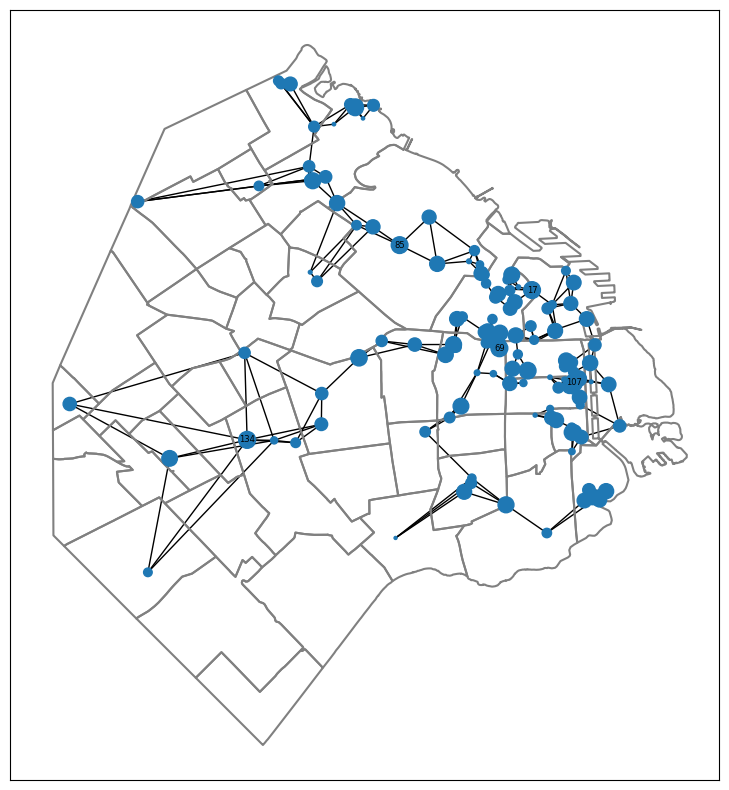

In [ ]:
factor_escala = 1e4 # Escalamos los nodos 10 mil veces para que sean bien visibles
fig, ax = plt.subplots(figsize=(10, 10)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
pr = np.random.uniform(0,1,museos.shape[0])# Este va a ser su score Page Rank. Ahora lo reemplazamos con un vector al azar
pr = pr/pr.sum() # Normalizamos para que sume 1
Nprincipales = 5 # Cantidad de principales
principales = np.argsort(pr)[-Nprincipales:] # Identificamos a los N principales
labels = {n: str(n) if i in principales else "" for i, n in enumerate(G.nodes)} # Nombres para esos nodos
nx.draw_networkx(G,G_layout,node_size = pr*factor_escala, ax=ax,with_labels=False) # Graficamos red
nx.draw_networkx_labels(G, G_layout, labels=labels, font_size=6, font_color="k") # Agregamos los nombres